## Implementation of Stochastic Gradient Descent From Scratch and Comparing Performance with Scikit-Learn SGD-Regressor Package on California Housing Data Set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Step1: Defining the Gradient Descent Function

In [3]:
#Formula For Gradient Descent
#yhat = xw+b, where x is input, w is weights and b is bias
#loss = (1/2n)sum([(y-yhat)^2])
#loss = (1/2n)sum([(y-(xw+b))^2])

def gradient_descent(x, y, w, b, learning_rate):
    dldb= np.zeros(len(x))
    dldw= np.zeros(len(x))
     
    dldw = (-2*(x.transpose()@(y - ((x@w.transpose()) + b))))/(len(x)*2)
    dldb = np.mean((-2*(y - ((x@w.transpose()) + b))))/(len(x)*2)
    
    dldw = dldw.T
    
    w = w - learning_rate*dldw
    b = b - learning_rate*dldb
    
    #print(dldw,dldb)
    return w, b

def find_loss(learning_rate, x, y ,n):
    list_loss = list()
    
    w = np.zeros(x.shape[1])   #np.random.rand(x.shape[1])
    b = 0                      #np.random.rand()
    w = w.reshape(1,-1)

    wi, bi = gradient_descent(x, y, w, b, learning_rate)
    
    for i in range(n):
        yhat = x@wi.transpose() + bi
        loss = (y-yhat)**2
        loss_function = sum(loss)/len(y)
        wi, bi = gradient_descent(x, y, wi, bi, learning_rate)

        #print(f'epoch {i}, loss is {loss_function}')
        list_loss.append(loss_function)
    return list_loss,wi,bi

#### Step2: Testing the Gradient Descent Function on a random data array

Text(0.5, 1.0, 'Loss Function on Random Data Array')

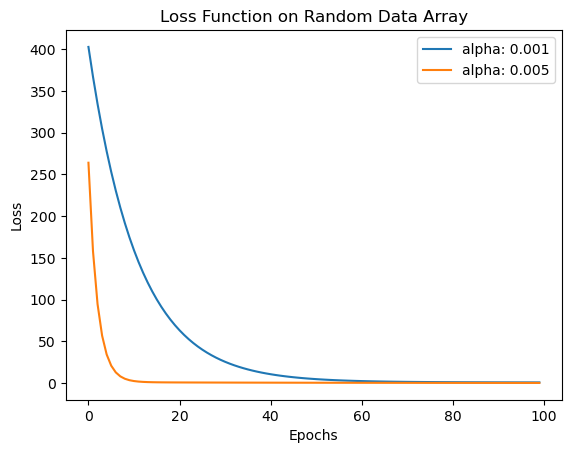

In [5]:
#testing above gradient descent function
x = np.random.randint(10, size=(2, 3))
y = np.sum(x*np.random.randint(1,9), axis=1).transpose()
y = y.reshape(-1,1)

number_of_iter = 100
learning_rate_001 = 0.001
learning_rate_01 = 0.005

loss_list_001,w1,b1 = find_loss(learning_rate_001, x, y, number_of_iter)
loss_list_01,w2,b2 = find_loss(learning_rate_01, x, y, number_of_iter)
        
plt.plot(loss_list_001, label='alpha')
plt.plot(loss_list_01, label='alpha')
plt.legend([f'alpha: {learning_rate_001}',f'alpha: {learning_rate_01}'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function on Random Data Array')

#### Step3: Fetching Califronia Housing Dataset to check how the manually defined gradient descent perform

In [9]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
cal_housing = pd.DataFrame(data= data.data, columns=data.feature_names)    

In [10]:
X = cal_housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

Y = data.target

In [11]:
from sklearn.preprocessing import MinMaxScaler

mnscaler = MinMaxScaler()

mnscaler.fit(X)
X_scaled = mnscaler.transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=cal_housing.columns)
X_scaled_df.head(),X_scaled_df.shape

(     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  0.539668  0.784314  0.043512   0.020469    0.008941  0.001499  0.567481   
 1  0.538027  0.392157  0.038224   0.018929    0.067210  0.001141  0.565356   
 2  0.466028  1.000000  0.052756   0.021940    0.013818  0.001698  0.564293   
 3  0.354699  1.000000  0.035241   0.021929    0.015555  0.001493  0.564293   
 4  0.230776  1.000000  0.038534   0.022166    0.015752  0.001198  0.564293   
 
    Longitude  
 0   0.211155  
 1   0.212151  
 2   0.210159  
 3   0.209163  
 4   0.209163  ,
 (20640, 8))

In [12]:
mnscaler = MinMaxScaler()
mnscaler.fit(Y.reshape(-1,1))
Y_scaled = mnscaler.transform(Y.reshape(-1,1))
Y_scaled, Y_scaled.shape

(array([[0.90226638],
        [0.70824656],
        [0.69505074],
        ...,
        [0.15938285],
        [0.14371281],
        [0.15340349]]),
 (20640, 1))

#### Step4: Doing Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, \
                                                    test_size=0.3, random_state=265)

#### Step5: Calling Gradient Descent and Loss-Fuction methods defined above to check model performance.

In [23]:
number_of_iter = 1000
learning_rate_001 = 0.001
learning_rate_01 = 0.005

loss_list_001,w1,b1 = find_loss(learning_rate_001, X_train, y_train, number_of_iter)
loss_list_01,w2,b2 = find_loss(learning_rate_01, X_train, y_train, number_of_iter)

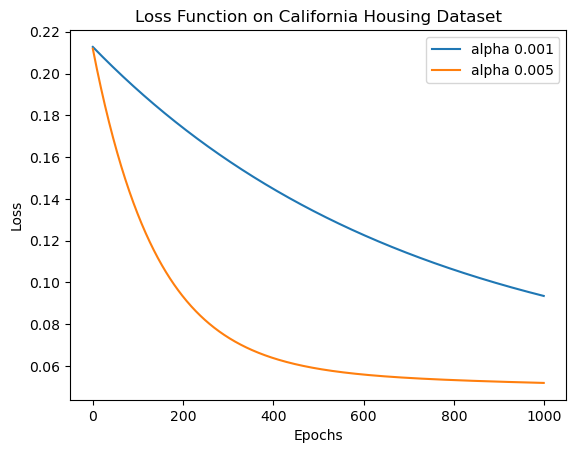

In [24]:
plt.plot(loss_list_001, label="alpha 0.001")
plt.plot(loss_list_01, label="alpha 0.005")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function on California Housing Dataset')
plt.show()

**As we can see below, Learning rate of 0.005 gives lower MSE**

In [29]:
yhat2 = ((X_test@w2.transpose()) + b2)
mse_test_set2 = np.mean((y_test-yhat2)**2)

yhat1 = ((X_test@w1.transpose()) + b2)
mse_test_set1 = np.mean((y_test-yhat1)**2)

print("Mean Square Error on Test Set with .001 Learning Rate is:", mse_test_set1)
print("Mean Square Error on Test Set with .005 Learning Rate is:", mse_test_set2)

Mean Square Error on Test Set with .001 Learning Rate is: 0.09330687918196805
Mean Square Error on Test Set is with .005 Learning Rate is: 0.051289719243532594



In [370]:
#As alpha of 0.005 gives lesser loss therefore choosing this as the best solution
param_dict = {}
for i in range(len(cal_housing.columns)):
    param_dict[cal_housing.columns[i]] = w2.T[i]
    
param_dict

{'MedInc': array([0.23262747]),
 'HouseAge': array([0.27868118]),
 'AveRooms': array([0.02160972]),
 'AveBedrms': array([0.01223252]),
 'Population': array([0.02374658]),
 'AveOccup': array([0.00078395]),
 'Latitude': array([0.15682719]),
 'Longitude': array([0.25064391])}

From the above dictionary, we can see that the three highest absolute weights have bee assigned on
**MedInc**, **HouseAge** and **Longitude**. Therefore these three atributes are factors
that explain the house prices the most.

As all the coefficients are positive, thus we can say, increase in any of the response variables will make the increase in targe variable by the response variable's coefficent times. For example, increase in 1 unit of MedInc will make the target variable increase by 0.23 times.


#### Step 6: Using a pre-packaged tool SGDRegressor provided by scikit for gradient descent and comparing the results.

In [371]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline


linear_model_cal = SGDRegressor(loss= 'squared_error', max_iter=number_of_iter, random_state = 265, alpha = 0.001)
sgd_calcualted_params = linear_model_cal.fit(X_train, y_train.flatten())

In [372]:
yhat_sgd = sgd_calcualted_params.predict(X_test)

mse_test_set_sgd = np.mean((y_test-yhat_sgd)**2)
print("Mean Square Error on Test Set is:", mse_test_set_sgd)

Mean Square Error on Test Set is: 0.07430769457845152


In [373]:
param_dict = {}
for i in range(len(cal_housing.columns)):
    param_dict[cal_housing.columns[i]] = sgd_calcualted_params.coef_[i]
    
param_dict

{'MedInc': 0.9839987707150233,
 'HouseAge': 0.14725323879315902,
 'AveRooms': 0.032891115360264865,
 'AveBedrms': 0.004027835244207346,
 'Population': 0.010564759752748993,
 'AveOccup': -0.005855451076355039,
 'Latitude': -0.21481652687545766,
 'Longitude': -0.184336204079387}

From the above dictionary, we can see that the three highest absolute weights have bee assigned on
**MedInc**, **Longitude** and **Latitude**. Therefore these three atributes are factors
that explain the house prices the most.

### Comparison Analysis
The results are almost similar with little bit of difference. In our case we are initializing the weights as 0s and then calculating gradient descent. As we have to reduce the overall cost therefore the wights are getting distributed in a different way than the SGD sklearn library. Although we can see, that other fields such as Houseage, Longitude are of importance in the SGDRegressor with little different value of weights than what we found. Thus overall both solutions provide a similar result.